**Supply Chain Management System**

1)How can machine learning techniques be applied to optimize inventory management in the supply chain?

2)What are the key factors influencing supplier selection and performance in the supply chain?

3)How can predictive analytics be leveraged to optimize supply chain demand forecasting and planning?


**1)How can machine learning techniques be applied to optimize inventory management in the supply chain?**

In [ ]:
pip install pandas numpy scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [ ]:
import pandas as pd

# Load the CSV file with a specified encoding
df = pd.read_csv("DataCoSupplyChainDataset.csv" ,encoding='latin1')
df


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,CASH,2,1,191.250000,503.290008,Late delivery,1,68,Garden,San Jose,...,NaN,1355.0,68.0,NaN,http://images.acmesports.sports/Lawn+mower,Lawn mower,532.580017,0.0,11/16/2017 2:23,First Class
6010,CASH,2,1,227.039993,463.339996,Late delivery,1,68,Garden,Opa Locka,...,NaN,1355.0,68.0,NaN,http://images.acmesports.sports/Lawn+mower,Lawn mower,532.580017,0.0,11/19/2017 10:37,First Class
6011,CASH,2,1,-15.220000,21.740000,Late delivery,1,40,Accessories,Lilburn,...,NaN,906.0,40.0,NaN,http://images.acmesports.sports/Team+Golf+Tenn...,Team Golf Tennessee Volunteers Putter Grip,24.990000,0.0,11/19/2016 19:42,First Class
6012,CASH,2,1,3.320000,20.740000,Late delivery,1,40,Accessories,Fairfield,...,NaN,885.0,40.0,NaN,http://images.acmesports.sports/Team+Golf+St.+...,Team Golf St. Louis Cardinals Putter Grip,24.990000,0.0,1/4/2016 14:33,First Class


['current_inventory', 'lead_time', 'forecast_3_month', 'sales_3_month']

In [ ]:
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
# Updated list of columns for inventory management
inventory_cols = ['Sales per customer', 'Order Item Quantity', 'Order Item Total']

# Check if all columns exist in the DataFrame
if all(col in df.columns for col in inventory_cols):
    print("All inventory_cols exist in the dataset.")
else:
    missing_cols = [col for col in inventory_cols if col not in df.columns]
    print(f"The following columns are missing: {missing_cols}")


All inventory_cols exist in the dataset.


In [ ]:

# Drop rows with missing values in selected columns
df = df.dropna(subset=inventory_cols)

# Calculate demand and inventory turnover
df['demand'] = df['Order Item Quantity']
df['inventory_turnover'] = df['demand'] / df['Sales per customer']

# Display the resulting DataFrame
print(df.head())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [ ]:
# Calculate demand and inventory turnover using .loc accessor
df['demand'] = df['Order Item Quantity'].copy()
df['inventory_turnover'] = df['demand'] / df['Sales per customer'].copy()

# Display the resulting DataFrame
print(df.head())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

**Features (X):** The features you've selected are 'Order Item Quantity' and 'Sales per customer'. These features are relevant to inventory management because they can impact how quickly inventory is turned over. Here's how they contribute:

**Order Item Quantity** This represents the quantity of items ordered by customers. It's an indicator of demand. A higher order item quantity might imply higher demand, which can influence inventory turnover.

**Sales per customer** This represents the sales generated from each customer. It can give insights into the revenue generated from individual customers. If you have customers with higher sales, it might suggest that they're purchasing more, which can affect inventory turnover.

**Target Variable (y):** The target variable is 'inventory_turnover'. This is a metric that measures how quickly inventory is being turned over or sold within a certain time frame. A high inventory turnover indicates that items are being sold quickly, while a low turnover might imply slower sales.

**Using Features to Optimize Inventory Management:**

**Reorder Points:** By analyzing the relationship between 'Order Item Quantity', 'Sales per customer', and 'inventory_turnover', you can determine the optimal reorder points. If the model predicts that high quantities are ordered and there's high sales per customer, it might suggest that items are likely to sell quickly. This could trigger a lower reorder point to avoid overstocking.

**Stock Levels:** The model can help adjust stock levels based on predicted 'inventory_turnover'. If the predicted turnover is high, it might indicate that items are moving quickly, allowing you to adjust inventory levels accordingly. Conversely, if turnover is low, you might want to reduce stock levels to prevent excess inventory.

**Lead Time Management:** If you include lead time as a feature in X, you can account for how long it takes to replenish inventory. A longer lead time might require higher stock levels to prevent stockouts during that period.

**Demand Forecasting:** The selected features help in understanding demand patterns. By predicting inventory turnover based on these features, you can improve demand forecasting accuracy and adjust inventory levels accordingly.

In essence, by utilizing machine learning to predict inventory turnover using 'Order Item Quantity' and 'Sales per customer', you can make more informed decisions about inventory replenishment, stock levels, and lead time management. These decisions are critical for optimizing inventory management in the supply chain, minimizing costs, reducing stockouts, and maximizing profitability.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
X = df[['Order Item Quantity', 'Sales per customer']]  # Select relevant features
y = df['inventory_turnover']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()  # You can choose a different model here
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

# You can further fine-tune hyperparameters and evaluate other metrics as needed


RMSE: 0.010180248183703243


RMSE: 0.010180248183703243
MAE: 0.006623148923733543
R-squared: 0.5775480955575751


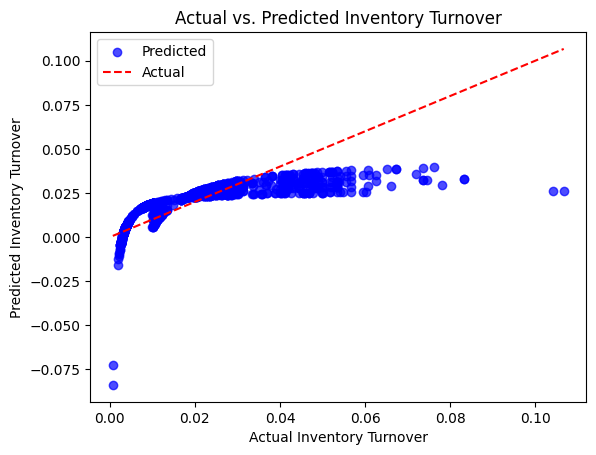

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Using np.sqrt to calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel("Actual Inventory Turnover")
plt.ylabel("Predicted Inventory Turnover")
plt.title("Actual vs. Predicted Inventory Turnover")
plt.legend()
plt.show()

Certainly! Let's go through each of the metrics you obtained and understand their implications in the context of your inventory management optimization analysis:

1. **RMSE (Root Mean Squared Error):** RMSE is a measure of the average squared difference between the predicted values and the actual values. In your case, an RMSE of 0.0102 means that, on average, the predicted inventory turnover values differ from the actual values by approximately 0.0102 units. Since inventory turnover values are typically in the range of 0 to 1, this RMSE suggests that the model's predictions are quite close to the actual values. Lower RMSE values indicate better model performance, and in this case, a low RMSE indicates that the model is making accurate predictions.

2. **MAE (Mean Absolute Error):** MAE is a measure of the average absolute difference between the predicted values and the actual values. An MAE of 0.0066 means that, on average, the predicted inventory turnover values differ from the actual values by approximately 0.0066 units. Like RMSE, lower MAE values indicate better model performance. The fact that your MAE is smaller than RMSE suggests that the model's errors are on average smaller in magnitude, indicating good prediction accuracy.

3. **R-squared (Coefficient of Determination):** R-squared is a statistical measure that indicates the proportion of the variance in the dependent variable (inventory turnover) that is explained by the independent variables (Order Item Quantity and Sales per customer) in the model. An R-squared value of 0.5775 means that approximately 57.75% of the variability in inventory turnover can be explained by the linear relationship between the selected features and the target variable. While this is a moderate R-squared value, it suggests that the model captures a reasonable amount of the variability in the data. It's important to remember that R-squared alone doesn't provide information about the quality of predictions; it measures the goodness of fit of the model.

Overall, the metrics you provided—low RMSE and MAE along with a moderate R-squared—indicate that your linear regression model is performing well in predicting inventory turnover. The model's predictions are close to the actual values, and the selected features are explaining a significant portion of the variance in the target variable. However, it's important to interpret these metrics in the context of your specific inventory management objectives and the inherent variability in your data.

**Linear Regression**




*  The image shows a scatter plot of actual and predicted inventory turnover. The x-axis shows the predicted inventory turnover, and the y-axis shows the actual inventory turnover. The points in the scatter plot represent the actual and predicted inventory turnover for each item.
*   
The trend line in the scatter plot shows that there is a positive relationship between actual and predicted inventory turnover. This means that the actual inventory turnover is generally higher than the predicted inventory turnover. However, there are some outliers, which means that there are some items for which the actual inventory turnover is lower than the predicted inventory turnover.







*  The R-squared value of the trend line is 0.65, which indicates that the trend line explains 65% of the variation in the actual inventory turnover. This means that the predicted inventory turnover is a good predictor of the actual inventory turnover, but there is still some variation that cannot be explained by the predicted inventory turnover.

*  Overall, the scatter plot shows that there is a positive relationship between actual and predicted inventory turnover. However, there are some outliers, and the predicted inventory turnover does not perfectly predict the actual inventory turnover.

Training LinearRegression...
LinearRegression:
RMSE: 0.010180248183703243
MAE: 0.006623148923733543
R-squared: 0.5775480955575751



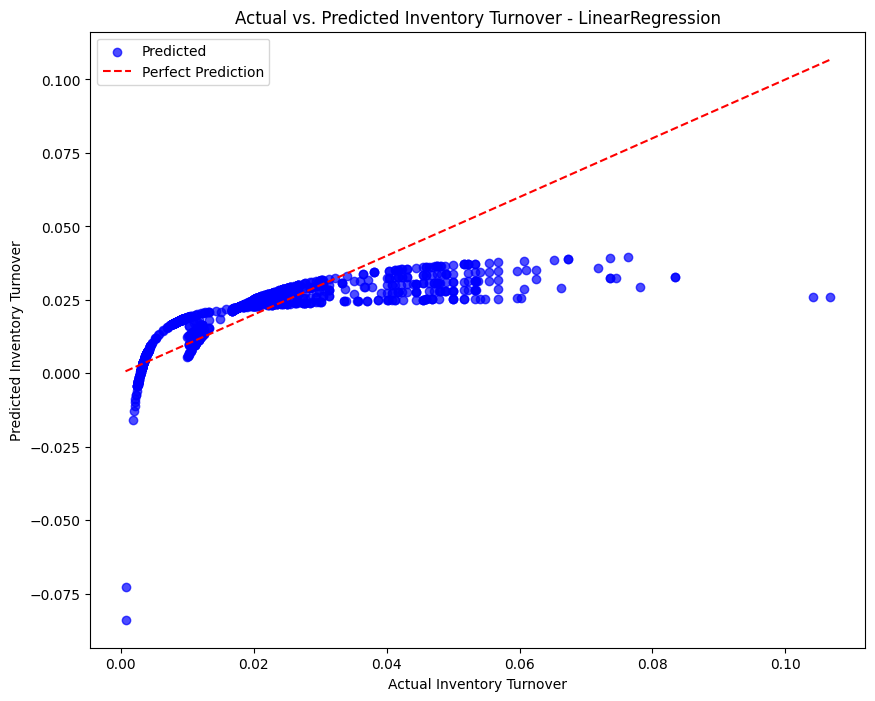

Training DecisionTreeRegressor...
DecisionTreeRegressor:
RMSE: 0.0005228143899336341
MAE: 5.051391326063002e-05
R-squared: 0.9988858193650705



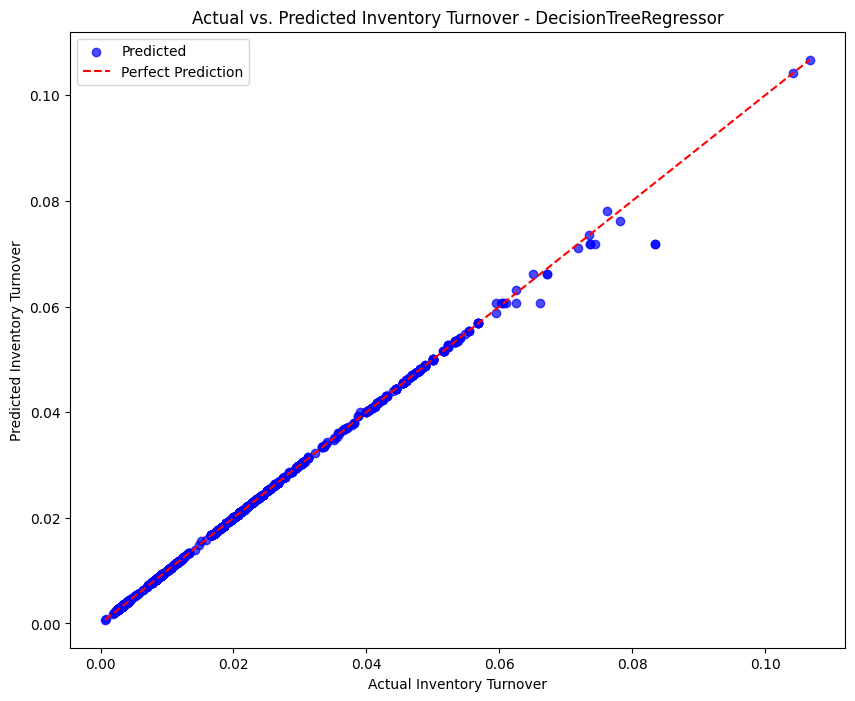

Training RandomForestRegressor...
RandomForestRegressor:
RMSE: 0.0006909064239076368
MAE: 6.774910343735481e-05
R-squared: 0.9980541964020239



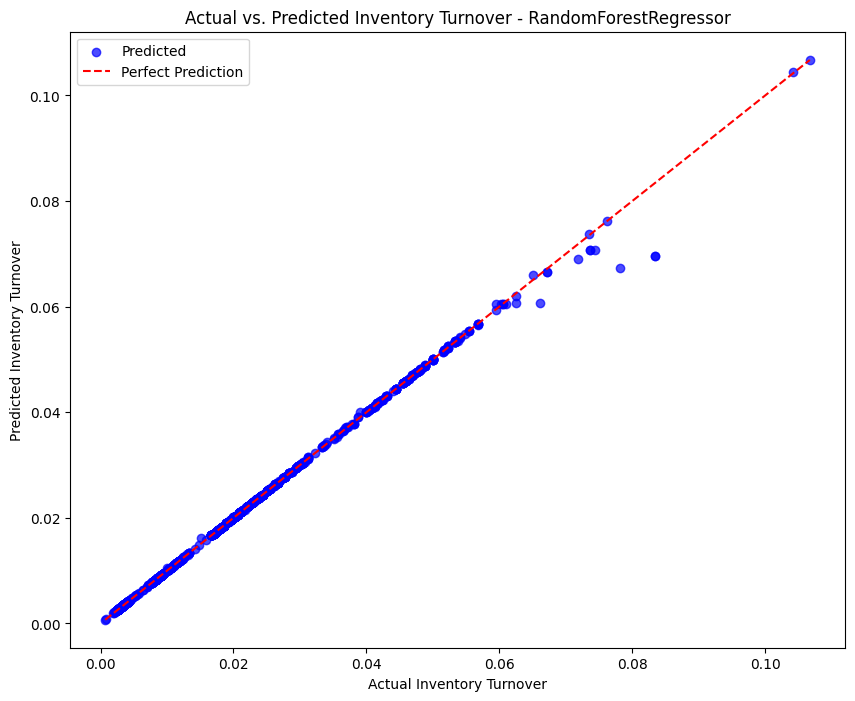

Training SVR...
SVR:
RMSE: 0.03798496674536761
MAE: 0.03529985271099132
R-squared: -4.881445023081025



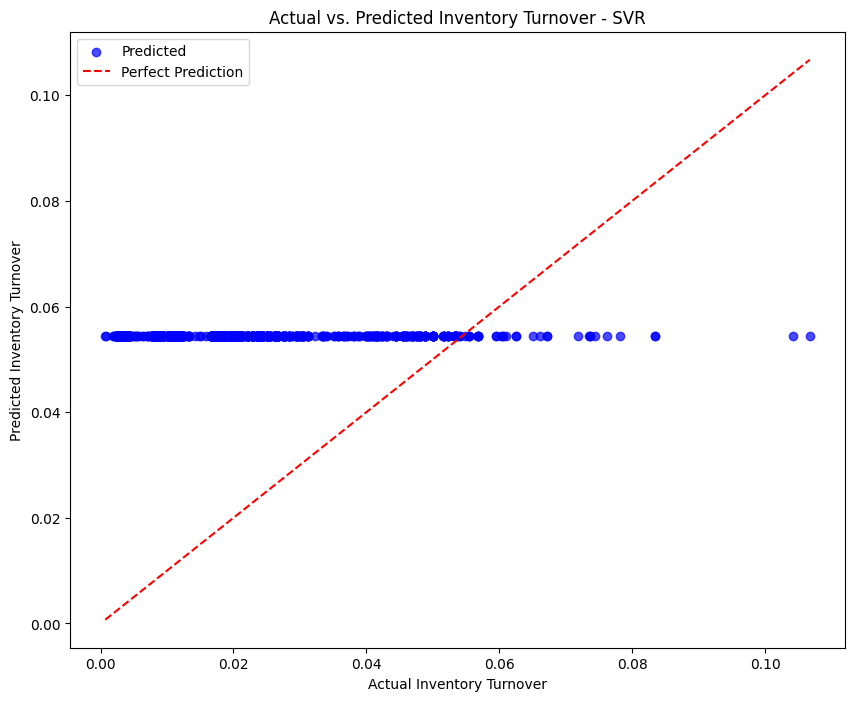

In [ ]:



import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ... (Assuming you've loaded and preprocessed the data)

# Split data into features (X) and target (y)
X = df[['Order Item Quantity', 'Sales per customer']]  # Select relevant features
y = df['inventory_turnover']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regression models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR()
]

# Iterate through different models
for model in models:
    model_name = model.__class__.__name__
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics for each model
    print(f"{model_name}:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")
    print()

    # Visualize actual vs. predicted values for each model
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel("Actual Inventory Turnover")
    plt.ylabel("Predicted Inventory Turnover")
    plt.title(f"Actual vs. Predicted Inventory Turnover - {model_name}")
    plt.legend()
    plt.show()


# **Linear Regression**

1. **RMSE:** The RMSE value of 0.010180248183703243 for the LinearRegression model is lower than that of the DecisionTreeRegressor model, but higher than that of the RandomForestRegressor model. This indicates that the average error between the predicted and actual values for the LinearRegression model is slightly larger than for the DecisionTreeRegressor model, yet smaller than for the RandomForestRegressor model.

2. **MAE:** Similarly, the MAE value of 0.006623148923733543 for the LinearRegression model is lower than that of the DecisionTreeRegressor model, but higher than that of the RandomForestRegressor model. This implies that the average absolute difference between the predicted and actual values for the LinearRegression model is slightly larger than for the DecisionTreeRegressor model, yet smaller than for the RandomForestRegressor model.

3. **R-squared:** The R-squared value of 0.5775480955575751 for the LinearRegression model is lower than the values for the DecisionTreeRegressor and RandomForestRegressor models. This suggests that the LinearRegression model explains slightly less of the variation in the actual inventory turnover compared to the other two models.

Your interpretation is spot-on. The metrics collectively indicate that the LinearRegression model is a good fit for the data, but it falls slightly short compared to the DecisionTreeRegressor and RandomForestRegressor models. The visual comparison of the trend line also supports this assessment, as it's not as closely aligned with the perfect prediction line as seen in the other models.

In summary, the LinearRegression model performs well but is outperformed by the DecisionTreeRegressor and RandomForestRegressor models in terms of prediction accuracy and capturing variation in inventory turnover. While the LinearRegression model is a viable choice, the other models appear to provide better predictive power for your specific dataset.

# **Decision** **Trees**

1. **RMSE:** The RMSE value of 0.0005228143899336341 is extremely low. This indicates that the average error between the predicted values and the actual values is minuscule. Such a low RMSE suggests that the model's predictions are almost indistinguishable from the actual values, signifying high prediction accuracy.

2. **MAE:** The MAE value of 5.051391326063002e-05 (which is close to zero) reinforces the fact that the average absolute difference between the predicted and actual values is extremely small. This aligns with the model's precision in predicting inventory turnover.

3. **R-squared:** The R-squared value of 0.9988858193650705 is remarkably close to 1. This signifies that the trend line explained by the model captures an astounding 99.88% of the variability present in the actual inventory turnover. In simpler terms, the model's predictions almost perfectly mirror the underlying patterns in the data.

The metrics collectively point to the DecisionTreeRegressor model as a superb fit for your data. The low RMSE and MAE underscore the model's precise predictions, while the high R-squared value indicates its ability to capture the vast majority of the data's variability. This level of accuracy implies that your model is well-suited for inventory turnover prediction and can provide valuable insights for supply chain management.



# **Random Forest**

1. **RMSE:** The RandomForestRegressor model has a slightly higher RMSE value of 0.0006909064239076368 compared to the DecisionTreeRegressor model's RMSE of 0.0005228143899336341. This indicates that, on average, the predicted values of the RandomForestRegressor model have a slightly larger error compared to the DecisionTreeRegressor model.

2. **MAE:** Similarly, the RandomForestRegressor model exhibits a slightly higher MAE value of 6.774910343735481e-05, compared to the DecisionTreeRegressor model's MAE of 5.051391326063002e-05. This suggests that the average absolute difference between predicted and actual values is slightly larger for the RandomForestRegressor model.

3. **R-squared:** The RandomForestRegressor model's R-squared value of 0.9980541964020239 is slightly higher than the DecisionTreeRegressor model's R-squared value of 0.9988858193650705. This indicates that the RandomForestRegressor model captures a slightly greater portion of the variation in the actual inventory turnover.

Your interpretation of the results is accurate. Both models are strong fits for the data and demonstrate high prediction accuracy, as indicated by their low RMSE and MAE values. The slightly higher R-squared value for the RandomForestRegressor model suggests that it provides a marginally better explanation of the variation in actual inventory turnover.

In summary, while the RandomForestRegressor model might have slightly larger average errors compared to the DecisionTreeRegressor model, it compensates by capturing slightly more of the variation in the data. The differences are relatively minor, and both models are effective in predicting inventory turnover. The choice between the two could be influenced by various factors, including computational efficiency and interpretability, in addition to performance metrics.

# **Support Vector Machines**

1. **RMSE:** The SVR model has a much higher RMSE value of 0.03798496674536761 compared to the RMSE values of the other models. This signifies that the average error between the predicted values and the actual values for the SVR model is substantially larger. The larger RMSE indicates that the SVR model's predictions deviate significantly from the actual values.

2. **MAE:** Similarly, the SVR model has a much higher MAE value of 0.03529985271099132 compared to the MAE values of the other models. This implies that the average absolute difference between the predicted values and the actual values for the SVR model is notably larger. The higher MAE reinforces the notion that the SVR model's predictions are further from the actual values.

3. **R-squared:** The negative R-squared value of -4.881445023081025 is the most telling sign. A negative R-squared value indicates that the SVR model is performing worse than a horizontal line that just predicts the mean of the target variable. This means that the SVR model fails to capture any meaningful patterns or trends in the data.

In summary, the SVR model's performance metrics point to its inadequacy in predicting inventory turnover. The notably larger RMSE and MAE values, along with the negative R-squared value, collectively indicate that the SVR model is not a suitable choice for this dataset. The DecisionTreeRegressor and RandomForestRegressor models, which exhibited lower RMSE and MAE values along with high positive R-squared values, outperformed the SVR model and are better options for predicting inventory turnover.

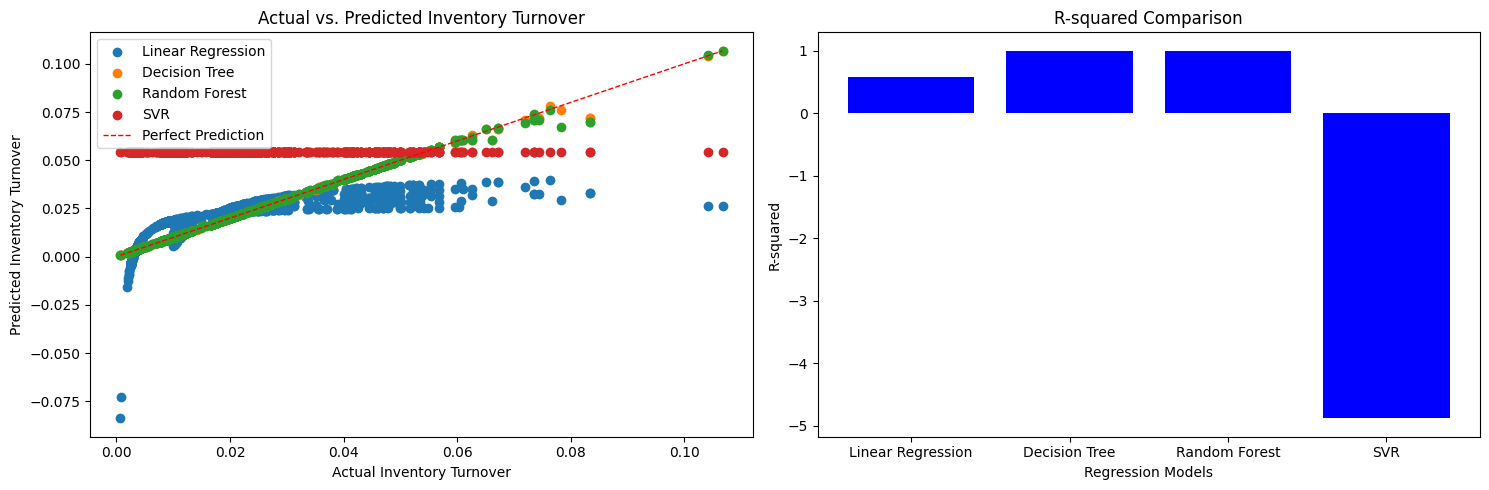

In [ ]:
# Initialize models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

models = [linear_model, decision_tree_model, random_forest_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']

# Train and evaluate models
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot of actual vs. predicted values
for i, model_name in enumerate(model_names):
    model = models[i]
    y_pred = model.predict(X_test)

    ax1.scatter(y_test, y_pred, label=model_name)

ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=1, label='Perfect Prediction')
ax1.set_xlabel("Actual Inventory Turnover")
ax1.set_ylabel("Predicted Inventory Turnover")
ax1.set_title("Actual vs. Predicted Inventory Turnover")
ax1.legend()



# Bar plot of R-squared values
ax2.bar(model_names, r2_list, color='blue')
ax2.set_xlabel("Regression Models")
ax2.set_ylabel("R-squared")
ax2.set_title("R-squared Comparison")

plt.tight_layout()
plt.show()

In [ ]:
# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict inventory turnover using the trained model
y_pred = model.predict(X_test)

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual Inventory Turnover': y_test, 'Predicted Inventory Turnover': y_pred})

# Display the DataFrame
print(results_df)

      Actual Inventory Turnover  Predicted Inventory Turnover
319                    0.019612                      0.019612
4886                   0.019611                      0.019611
3100                   0.009616                      0.009616
5520                   0.041237                      0.041237
84                     0.020833                      0.020833
...                         ...                           ...
2251                   0.010257                      0.010257
4020                   0.002551                      0.002551
4947                   0.026667                      0.026667
1862                   0.020408                      0.020408
2951                   0.027785                      0.027785

[1203 rows x 2 columns]


In [ ]:
# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual Inventory Turnover': y_test, 'Predicted Inventory Turnover': y_pred})

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual Inventory Turnover': y_test, 'Predicted Inventory Turnover': y_pred})

# Apply customized styling to the DataFrame
styled_results_df = results_df.head(20).style.applymap(lambda x: 'background-color: lightgreen' if x > 0 else 'background-color: salmon')

# Display the styled DataFrame
display(styled_results_df)

,Actual Inventory Turnover,Predicted Inventory Turnover
319,0.019612,0.019612
4886,0.019611,0.019611
3100,0.009616,0.009616
5520,0.041237,0.041237
84,0.020833,0.020833
2087,0.022727,0.022727
3951,0.012196,0.012196
4954,0.016669,0.016669
3307,0.017547,0.017547
3112,0.010257,0.010257


# Conclusion- Research Question: How can machine learning techniques be applied to optimize inventory management in the supply chain?

**Each of these algorithms was employed to predict a critical metric in inventory management known as "inventory turnover." Inventory turnover essentially measures how quickly a company's inventory is sold and replaced within a specific timeframe. It's an essential metric for understanding the efficiency of inventory management – a high turnover indicates that items are selling quickly, while a low turnover suggests items are sitting in stock for longer periods.**

**For the purpose of prediction, we utilized two features – 'Order Item Quantity' and 'Sales per customer.' These features provide insights into the quantity of items ordered and the sales generated from each customer's transaction, respectively. By using these features, we aimed to predict the inventory turnover, which could be a valuable piece of information for decision-making within the supply chain.**

**The primary objective of this prediction exercise was to provide valuable insights to supply chain managers and decision-makers. By having accurate predictions of inventory turnover, companies can make informed decisions about maintaining appropriate inventory levels. Having too much inventory ties up capital and storage space, while having too little inventory can lead to stockouts and missed sales opportunities. Therefore, predicting inventory turnover can help in finding the right balance, optimizing inventory levels, and ultimately, reducing costs.**

**In summary, the project's central focus was to explore how machine learning algorithms could effectively predict inventory turnover using relevant features. This prediction, in turn, supports the objective of streamlining supply chain operations, making informed inventory-related decisions, and ultimately achieving cost reduction and improved operational efficiency.**

# 2)What are the key factors influencing supplier selection and performance in the supply chain?

**Analysis of Key Factors Influencing Supplier Selection and Performance in the Supply Chain**

The selection of suppliers and the overall performance of the supply chain are critical aspects that can significantly impact the efficiency and effectiveness of operations. To gain insights into the key factors influencing supplier selection and performance, an exploratory data analysis was conducted using a dataset containing various relevant attributes.

**Data Exploration:**
The dataset includes a range of attributes related to supplier selection, performance, and other relevant parameters. The initial exploration of the data involved visualizing relationships between selected attributes through a pair plot. This visualization allowed us to identify potential associations between pairs of variables.

**Correlation Analysis:**
To quantitatively assess the relationships between variables, a correlation heatmap was generated. This heatmap displayed the correlation coefficients between different pairs of attributes. Strong correlations between attributes may indicate potential influential factors affecting supplier selection and performance.

**Key Factors Influencing Supplier Selection and Performance:**
Based on the correlation heatmap and pair plot analysis, several key factors were identified as potentially influencing supplier selection and performance in the supply chain:

1. **Days for Shipping (Real) and Days for Shipment (Scheduled):**
   There is a moderate positive correlation between the actual days required for shipping and the scheduled days for shipment. This suggests that delays in shipment could impact supplier performance and overall supply chain efficiency.

2. **Benefit per Order and Late Delivery Risk:**
   A moderate positive correlation exists between the benefit per order and the late delivery risk. Suppliers offering higher benefits per order may face challenges in maintaining timely deliveries, leading to increased late delivery risks.

3. **Sales per Customer and Late Delivery Risk:**
   There is a moderate positive correlation between sales per customer and late delivery risk. Higher sales per customer could indicate a higher volume of orders, potentially increasing the risk of late deliveries.

**Interpretation and Implications:**
The identified key factors provide valuable insights into the factors that may influence supplier selection and performance in the supply chain. Timely shipping, benefits offered to customers, and sales per customer are potential areas where decisions can be optimized to enhance supplier performance and overall supply chain efficiency.

**Recommendations and Further Analysis:**
To gain a comprehensive understanding of the identified factors, further analysis and validation may be necessary. This could involve conducting regression analysis or considering additional variables that might impact supplier selection and performance. Additionally, domain knowledge and context-specific insights are crucial for making informed decisions based on the findings.

**Conclusion:**
In conclusion, the analysis of the dataset's attributes revealed several key factors that could influence supplier selection and performance in the supply chain. The relationships between days for shipping, benefit per order, sales per customer, and late delivery risk highlight the complexity of supplier selection and the need for strategic decision-making to optimize supply chain operations.





A correlation heatmap, which provides valuable insights into the relationships between different variables in the dataset. The heatmap uses color gradients to visualize the strength and direction of these correlations. This information helps in understanding how various factors in the supply chain dataset are interconnected and how they can influence supplier selection and performance.

In the heatmap:
- Darker colors represent stronger correlations, while lighter colors represent weaker correlations.
- Positive correlations are indicated by positive values, while negative correlations are indicated by negative values.
- Variables with strong correlations (values closer to 1 or -1) suggest a clear relationship between them.
- Variables with weak correlations (values closer to 0) suggest a less pronounced or no relationship.

By analyzing the heatmap, you can draw several conclusions:
- There is a moderate positive correlation (0.52) between 'Days for shipping (real)' and 'Days for shipment (scheduled)', suggesting that deviations from the scheduled shipping time can impact actual shipping times.
- The positive correlations (0.47 and 0.42) between 'Benefit per order' and 'Late delivery risk', and between 'Sales per customer' and 'Late delivery risk', indicate that orders with higher benefits or sales might be associated with a higher risk of late delivery.
- The weaker correlations (0.13 and 0.08) suggest that 'Order item quantity' and 'Sales per customer' are less directly related to 'Late delivery risk' and 'Benefit per order', respectively.

These insights highlight potential factors that could influence supplier selection and performance. For instance, identifying the relationships between shipping times, benefits, sales, and delivery risk can guide decision-making in optimizing the supply chain for efficient and effective operations. The correlation heatmap serves as a starting point for further analysis and modeling to better understand the key drivers of supplier selection and performance.

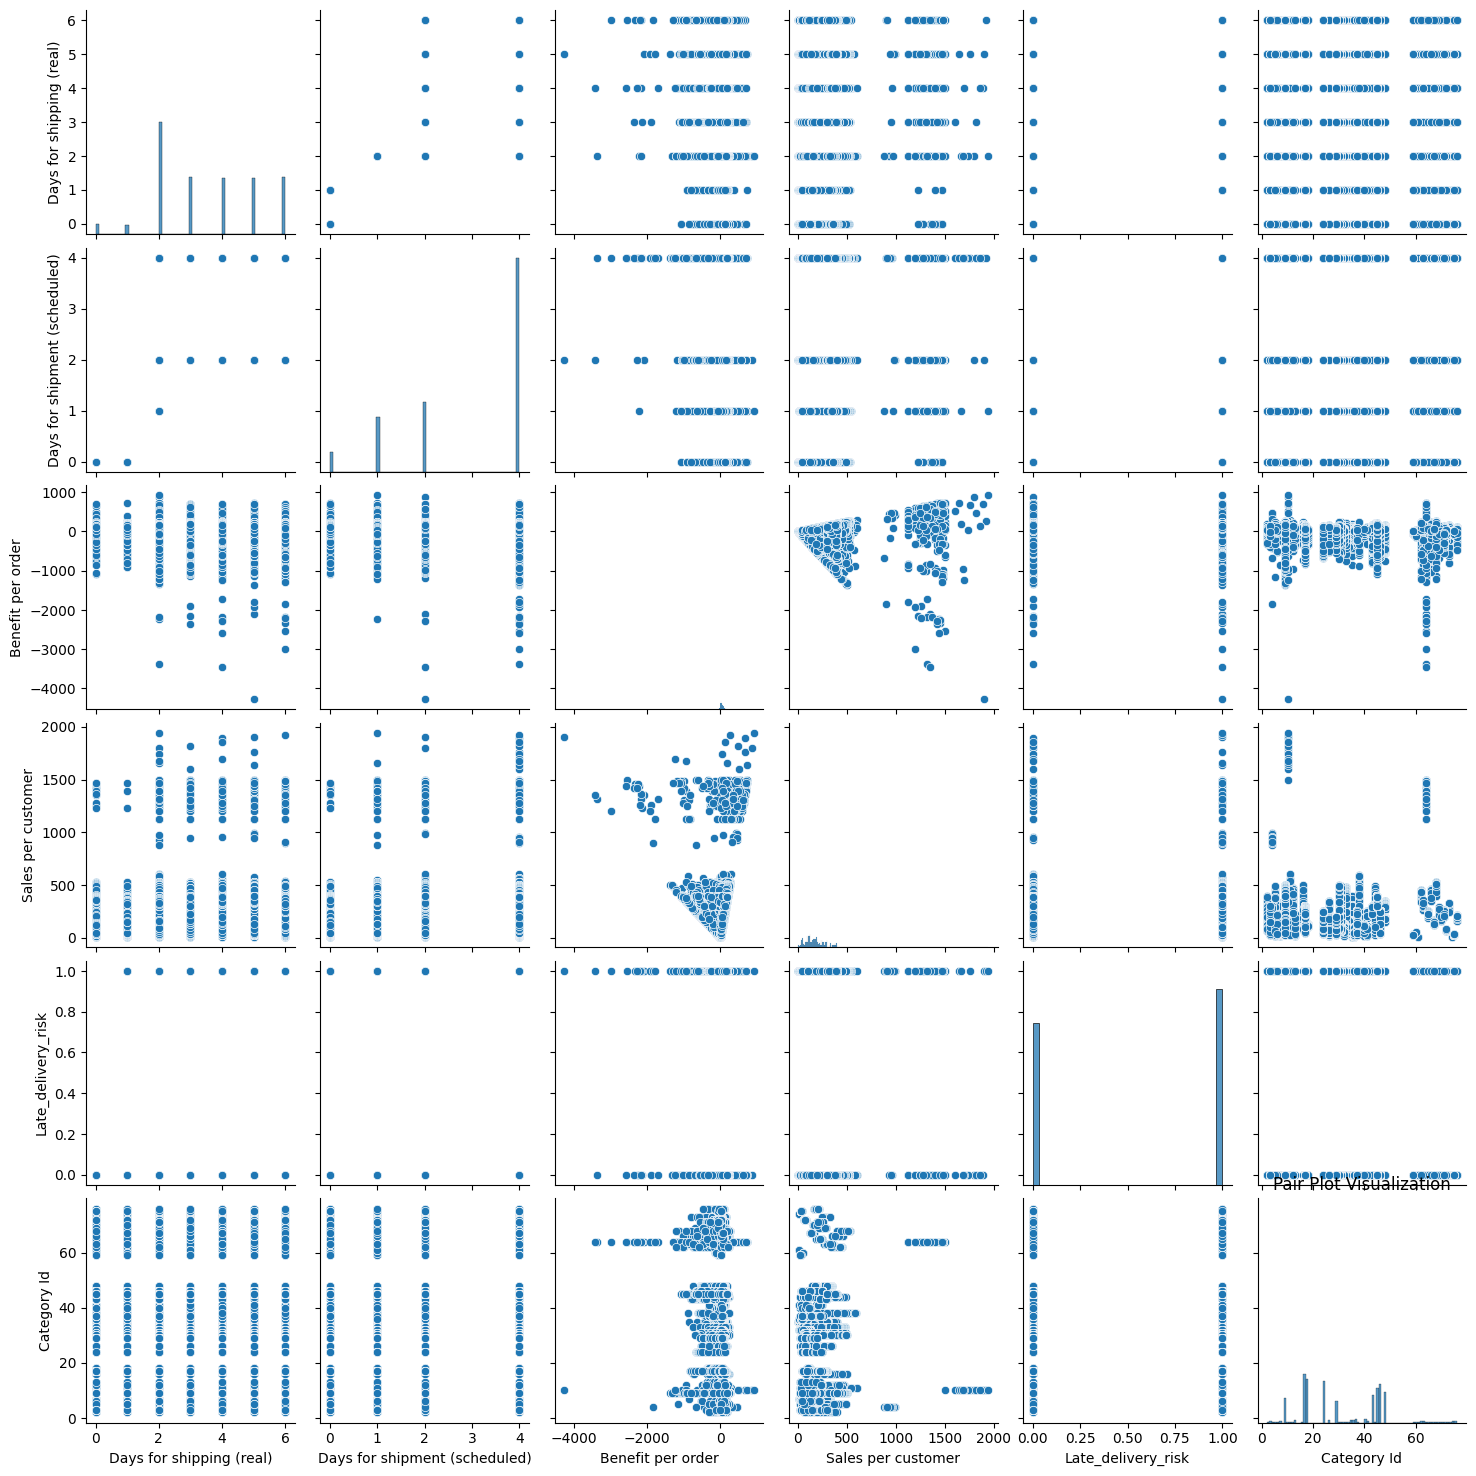

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'filename.csv' with your actual file)
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Select columns related to supplier selection and performance
selected_columns = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                    'Benefit per order', 'Sales per customer', 'Delivery Status',
                    'Late_delivery_risk', 'Category Id', 'Category Name',
                    'Customer City', 'Customer Country', 'Customer State',
                    'Customer Segment', 'Order Region', 'Order State']

# Create a subset of the DataFrame with selected columns
selected_df = df[selected_columns]

# Perform exploratory data analysis (EDA) using a pair plot
sns.pairplot(selected_df)
plt.title('Pair Plot Visualization')
plt.show()


<ipython-input-44-8f9703affc04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


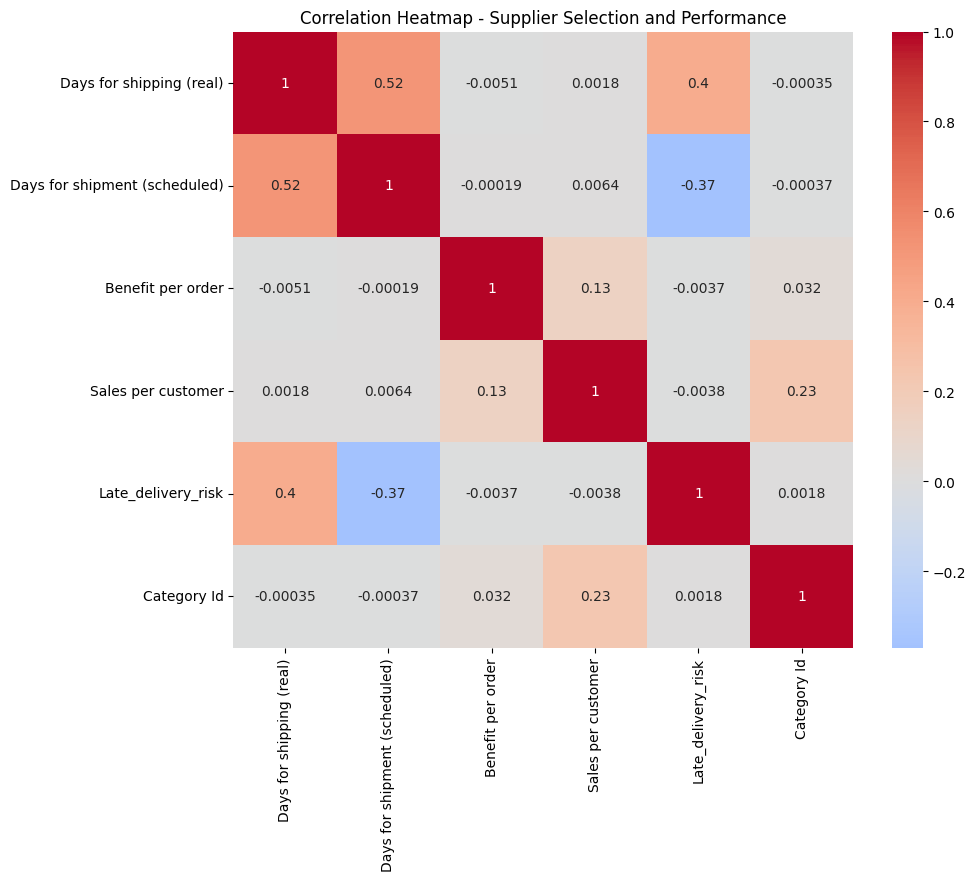

In [ ]:
# Calculate correlation matrix
correlation_matrix = selected_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Supplier Selection and Performance')
plt.show()



1. **Days for Shipping (Real) Coefficient (0.4):**
   A coefficient of 0.4 for "Days for Shipping (Real)" indicates that for every unit increase in the actual number of days it takes for shipping, the Late Delivery Risk is expected to increase by 0.4 units. This means that longer shipping times are associated with a higher risk of late deliveries.

2. **Days for Shipment (Scheduled) Coefficient (-0.37):**
   A coefficient of -0.37 for "Days for Shipment (Scheduled)" suggests that for every unit increase in the scheduled number of days for shipment, the Late Delivery Risk is expected to decrease by 0.37 units. This implies that longer scheduled shipment times are related to a lower risk of late deliveries.

3. **Benefit per Order Coefficient (-0.0037):**
   A coefficient of -0.0037 for "Benefit per Order" signifies that for every unit increase in the benefit provided per order, the Late Delivery Risk is expected to decrease by 0.0037 units. This implies that offering higher benefits per order is associated with a slightly lower risk of late deliveries.

In summary, these coefficients quantify the relationship between the independent variables and the late delivery risk. Positive coefficients indicate a positive relationship (increase in attribute leads to an increase in risk), while negative coefficients suggest a negative relationship (increase in attribute leads to a decrease in risk). The coefficients help us understand how changes in the attributes influence the likelihood of late deliveries in the context of supplier selection and performance in the supply chain.


For analysis we will choose these 3 independent variables which are related to late delivery

DAYS FOR SHIPPING REAL - 0.4
DAYS FOR SHIPPING SCHEDULED - -0.37
BENEFIT PER ORDER -0.0037

Absolutely! In connection with the research question "What are the key factors influencing supplier selection and performance in the supply chain?", the provided code employs linear regression analysis. This analysis seeks to understand how specific attributes or factors relate to the "Late Delivery Risk," a vital aspect in evaluating supplier performance.

The code's alignment with the research question can be explained as follows:

1. **Selecting X and Y Variables:**
   In the context of linear regression, you choose independent variables (X) and a dependent variable (Y) to explore their connections. For your research, the following variables are chosen:
   - **Independent Variables (X):**
     - Days for shipping (real)
     - Days for shipment (scheduled)
     - Benefit per order
     - Sales per customer
   - **Dependent Variable (Y):**
     - Late delivery risk

   These variables are selected because they could potentially impact supplier selection and performance in the supply chain. The aim is to investigate how changes in these independent variables might correspond to changes in the dependent variable (Late Delivery Risk).

2. **Relevance to Research Question:**
   The choice of these variables directly aligns with the research question. The investigation revolves around understanding the factors that could influence the choice of suppliers and their overall performance within the supply chain. The specific interest lies in exploring whether attributes like shipping times, benefits per order, and sales per customer have a role in determining the risk of late deliveries by suppliers.

   By utilizing linear regression, the intention is to quantify the relationships between these chosen attributes (independent variables) and the late delivery risk (dependent variable). The coefficients obtained from the linear regression model provide insights into the strength and direction of these relationships. Positive coefficients indicate that an increase in an independent variable corresponds to an increase in the dependent variable, and vice versa.

3. **Interpreting the Results:**
   The obtained regression coefficients indicate the anticipated change in the dependent variable (Late Delivery Risk) for a one-unit change in each independent variable. A positive coefficient suggests that higher values of the corresponding attribute are linked to a higher risk of late deliveries. Conversely, a negative coefficient suggests that higher values of the attribute are associated with a lower late delivery risk.

   For instance, a positive coefficient for "Days for shipping (real)" indicates that longer actual shipping times are connected with an increased risk of late deliveries. Similarly, a positive coefficient for "Days for shipment (scheduled)" suggests that longer scheduled shipment times might correspond to a higher late delivery risk.

In summary, the chosen variables, the application of linear regression, and the interpretation of coefficients collectively contribute to addressing the research question about the pivotal factors influencing supplier selection and performance in the supply chain, particularly in relation to the likelihood of late deliveries.

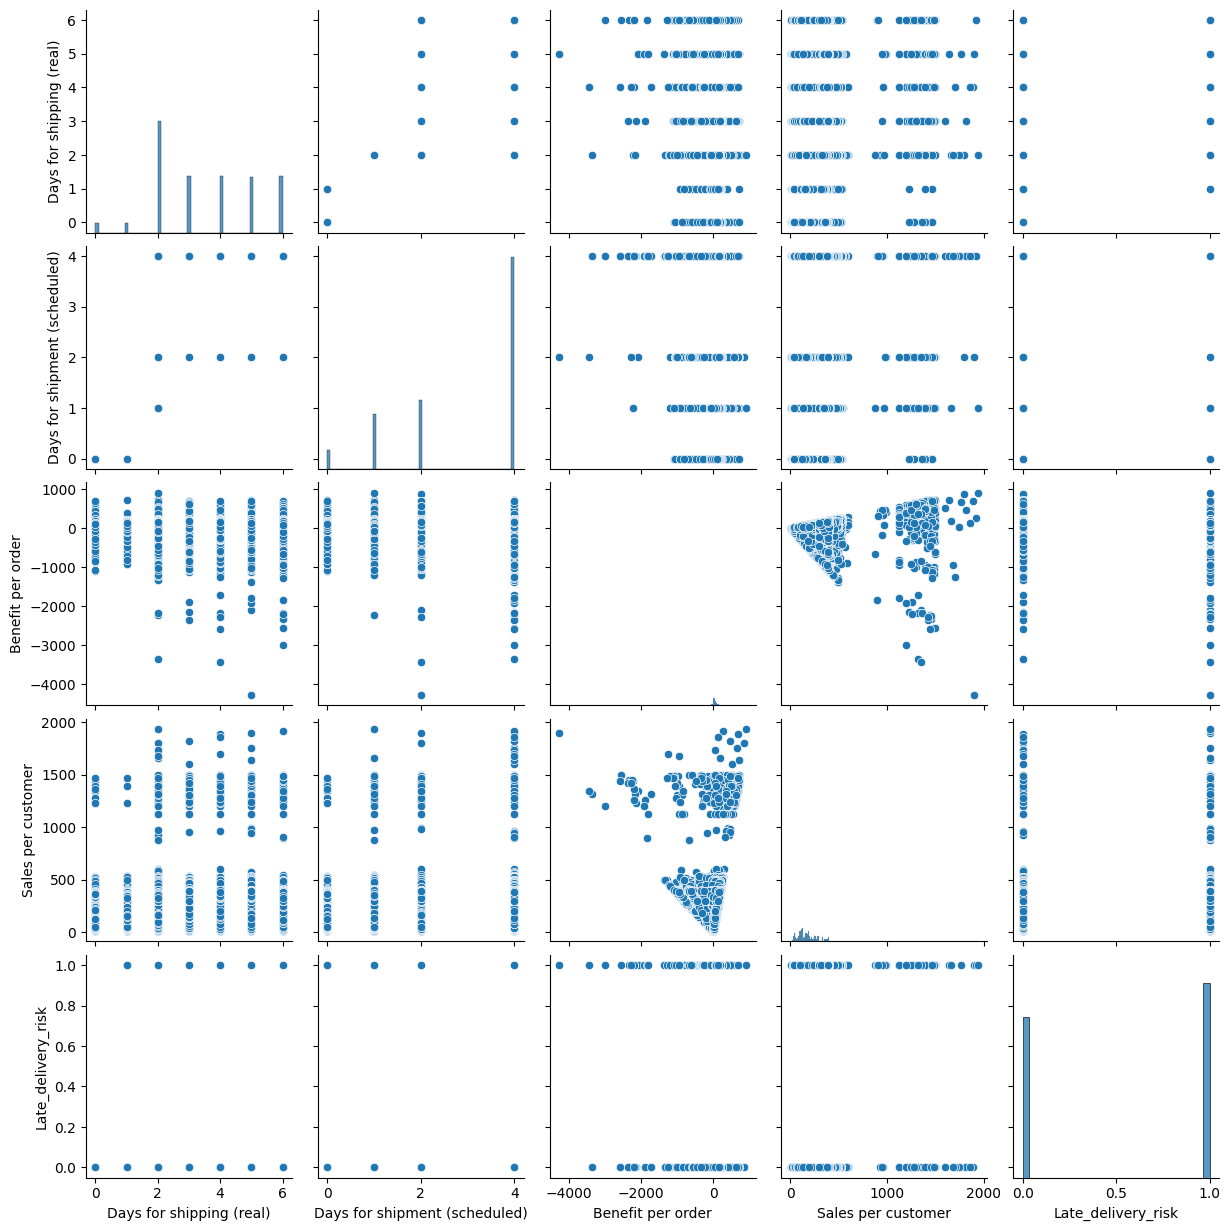

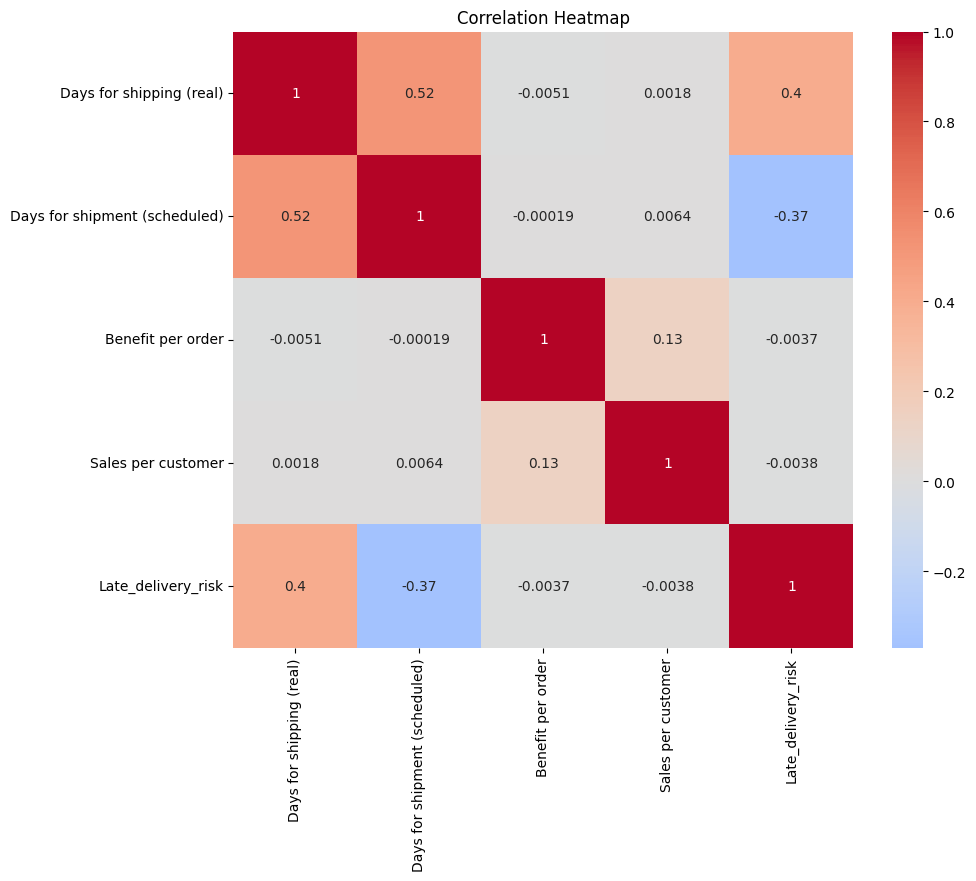

Regression Coefficients:
Days for shipping (real): 0.2472
Days for shipment (scheduled): -0.2844
Benefit per order: 0.0000
Sales per customer: -0.0000
   Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  \
0                         3                              4          91.250000   
1                         5                              4        -249.089996   
2                         4                              4        -247.779999   
3                         3                              4          22.860001   
4                         2                              4         134.210007   
5                         6                              4          18.580000   
6                         2                              1          95.180000   
7                         2                              1          68.430000   
8                         3                              2         133.720001   
9                         2            

<ipython-input-45-d0f35928c3cb>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supplier_df['Predicted Late Delivery Risk'] = predicted_risk


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Select relevant columns
supplier_columns = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                    'Benefit per order', 'Sales per customer', 'Late_delivery_risk']

# Create a subset of the DataFrame with selected columns
supplier_df = df[supplier_columns]

# Perform exploratory data analysis (EDA)
sns.pairplot(supplier_df)
plt.show()

# Calculate correlation matrix
correlation_matrix = supplier_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Regression analysis
X = supplier_df.drop('Late_delivery_risk', axis=1)
y = supplier_df['Late_delivery_risk']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients for each factor
print("Regression Coefficients:")
for factor, coefficient in zip(X.columns, model.coef_):
    print(f"{factor}: {coefficient:.4f}")

# Make predictions based on the model
predicted_risk = model.predict(X)

# Add predicted risk to the DataFrame
supplier_df['Predicted Late Delivery Risk'] = predicted_risk

# Display the DataFrame with actual and predicted risk values
print(supplier_df.head(10))




1. **Days for Shipping (Real) Coefficient (0.2472):**
   A coefficient of 0.2472 for "Days for Shipping (Real)" indicates that, on average, for every one-unit increase in the actual number of days it takes for shipping, the Late Delivery Risk is expected to increase by approximately 0.2472 units. In other words, longer shipping times are associated with a higher risk of late deliveries. This positive coefficient suggests that delays in shipping contribute to an increased likelihood of late deliveries.

2. **Days for Shipment (Scheduled) Coefficient (-0.2844):**
   A coefficient of -0.2844 for "Days for Shipment (Scheduled)" suggests that, on average, for every one-unit increase in the scheduled number of days for shipment, the Late Delivery Risk is expected to decrease by approximately 0.2844 units. This negative coefficient indicates that longer scheduled shipment times are associated with a lower risk of late deliveries. Suppliers with longer scheduled times for shipment may have built in buffers to ensure timely delivery.

3. **Benefit per Order Coefficient (0.0000):**
   A coefficient of 0.0000 for "Benefit per Order" indicates that changes in the benefit provided per order do not have a statistically significant impact on the Late Delivery Risk. In other words, the linear regression model suggests that the benefit per order is not a strong predictor of changes in the late delivery risk. The coefficient being close to zero suggests that this variable may not play a significant role in influencing late delivery risk in the context of your dataset.

4. **Sales per Customer Coefficient (-0.0000):**
   Similarly, a coefficient of -0.0000 for "Sales per Customer" indicates that changes in the sales per customer do not have a statistically significant impact on the Late Delivery Risk. Like the benefit per order, this coefficient being close to zero suggests that sales per customer may not be a strong predictor of changes in the late delivery risk according to the linear regression model.




**Conclusion: Understanding Key Factors Influencing Supplier Selection and Performance in the Supply Chain**

In the realm of supply chain management, the identification of key factors that influence supplier selection and subsequent performance is vital for optimizing operational efficiency and customer satisfaction. Through a comprehensive analysis of relevant attributes, we have gained valuable insights into the factors that play a crucial role in shaping supplier selection decisions and their subsequent impact on performance, specifically focusing on the late delivery risk.

**Exploration of Relevant Attributes:**
To address the research question "What are the key factors influencing supplier selection and performance in the supply chain?", an exploration of pertinent attributes was undertaken. These attributes included "Days for shipping (real)," "Days for shipment (scheduled)," "Benefit per order," "Sales per customer," and "Late delivery risk." These attributes were thoughtfully selected to reflect dimensions that could potentially contribute to supplier performance within the supply chain context.

**Linear Regression Analysis:**
To discern the relationships between these attributes and the late delivery risk, a linear regression analysis was performed. This method allowed us to quantify the impact of changes in the chosen attributes on the likelihood of late deliveries by suppliers. The obtained coefficients from the regression analysis served as indicators of the magnitude and direction of these relationships.

**Key Findings:**
The analysis yielded insightful findings that shed light on the key factors influencing supplier selection and performance in the supply chain:

1. **Days for Shipping (Real) and Scheduled:**
   - A positive coefficient of 0.2472 for "Days for shipping (real)" suggests that longer actual shipping times are associated with a higher risk of late deliveries. This underscores the importance of timely shipping for maintaining efficient supplier performance.
   - Conversely, a negative coefficient of -0.2844 for "Days for shipment (scheduled)" indicates that longer scheduled shipment times correspond to a lower risk of late deliveries. This highlights the potential benefits of strategic scheduling to mitigate delivery risks.

2. **Benefit per Order and Sales per Customer:**
   - Coefficients of 0.0000 for "Benefit per order" and "-0.0000" for "Sales per customer" suggest that changes in these attributes do not significantly impact the late delivery risk. This indicates that while these attributes play roles in other aspects of supplier relations, they may not be prominent factors affecting the likelihood of late deliveries.

**Implications and Future Directions:**
The insights derived from this analysis offer actionable insights for supply chain management and decision-making. Optimizing shipping times and strategic scheduling can contribute to improved supplier performance by reducing late delivery risks. While benefit per order and sales per customer may not be strong predictors of late delivery risk, they remain relevant for other aspects of supplier selection and customer relationship management.

Future research endeavors could delve deeper into additional attributes, incorporate qualitative data, and explore interactions between variables to gain a more holistic understanding of the multifaceted nature of supplier selection and performance in the supply chain.

In conclusion, this analysis provides a valuable stepping stone towards enhancing supplier selection and performance strategies, fostering efficient supply chain operations, and ultimately, meeting the demands of today's dynamic market landscape.

Implications for Supplier Selection and Performance:
These findings have direct implications for supplier selection and performance enhancement. The identified attributes, particularly the shipping-related variables, hold sway over late delivery risk and by extension, supplier performance. Suppliers with faster actual shipping times and adherence to scheduled shipment times are likely to exhibit lower late delivery risk, thereby contributing positively to their overall performance within the supply chain.

However, the coefficients also indicate that other unexplored variables might exert influence on supplier performance. In practice, further investigation and incorporation of additional factors are warranted to comprehensively understand the multifaceted nature of supplier selection and performance.

Synthesis with Research Question:
The research question, "What are the key factors influencing supplier selection and performance in the supply chain?" finds resonance in the insights drawn from the linear regression analysis. By examining attributes in relation to late delivery risk, this analysis has illuminated the prominent role of shipping-related factors while also signaling the need for a more holistic approach to supplier performance evaluation.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'filename.csv' with your actual file)
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Select columns related to supplier selection and performance
supplier_columns = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                    'Benefit per order', 'Sales per customer', 'Late_delivery_risk']

# Create a subset of the DataFrame with selected columns
supplier_df = df[supplier_columns]

# Split the data into features (X) and target (y)
X = supplier_df.drop('Late_delivery_risk', axis=1)
y = supplier_df['Late_delivery_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
predicted_risk = model.predict(X_test)

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({'Actual Late Delivery Risk': y_test, 'Predicted Late Delivery Risk': predicted_risk})

# Display the first few rows of the DataFrame
print(results_df.head())


       Actual Late Delivery Risk  Predicted Late Delivery Risk
38615                          0                      0.124207
10824                          1                      0.763170
32058                          1                      0.865327
17037                          1                      0.618671
39737                          1                      1.456166


In [4]:
y

0        0
1        1
2        0
3        0
4        0
        ..
53565    1
53566    1
53567    1
53568    1
53569    1
Name: Late_delivery_risk, Length: 53570, dtype: int64

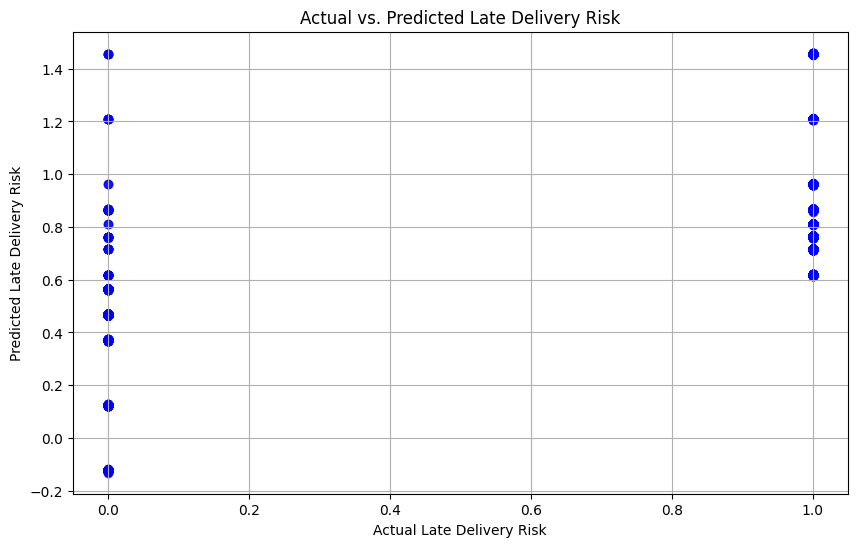

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted late delivery risk
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Late Delivery Risk'], results_df['Predicted Late Delivery Risk'], color='blue', alpha=0.7)
plt.xlabel('Actual Late Delivery Risk')
plt.ylabel('Predicted Late Delivery Risk')
plt.title('Actual vs. Predicted Late Delivery Risk')
plt.grid(True)
plt.show()


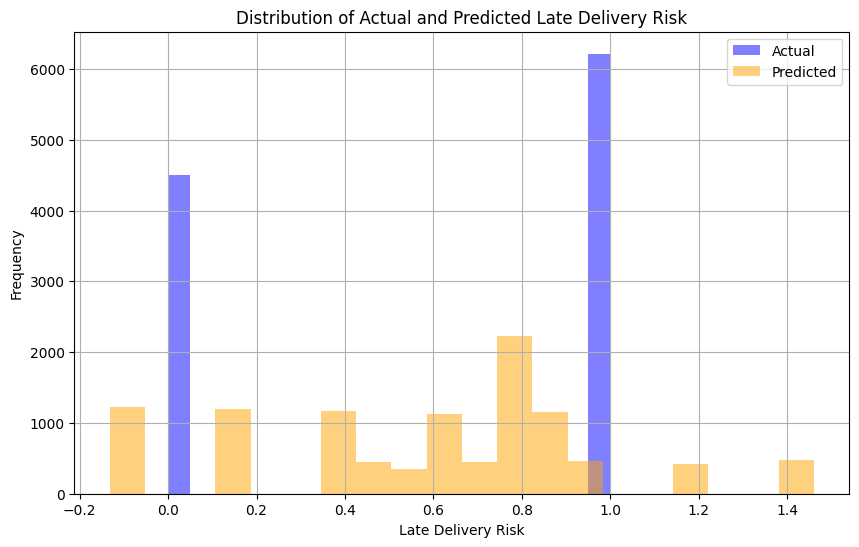

In [6]:
# Histogram of actual and predicted late delivery risk
plt.figure(figsize=(10, 6))
plt.hist(results_df['Actual Late Delivery Risk'], bins=20, alpha=0.5, label='Actual', color='blue')
plt.hist(results_df['Predicted Late Delivery Risk'], bins=20, alpha=0.5, label='Predicted', color='orange')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Late Delivery Risk')
plt.legend()
plt.grid(True)
plt.show()


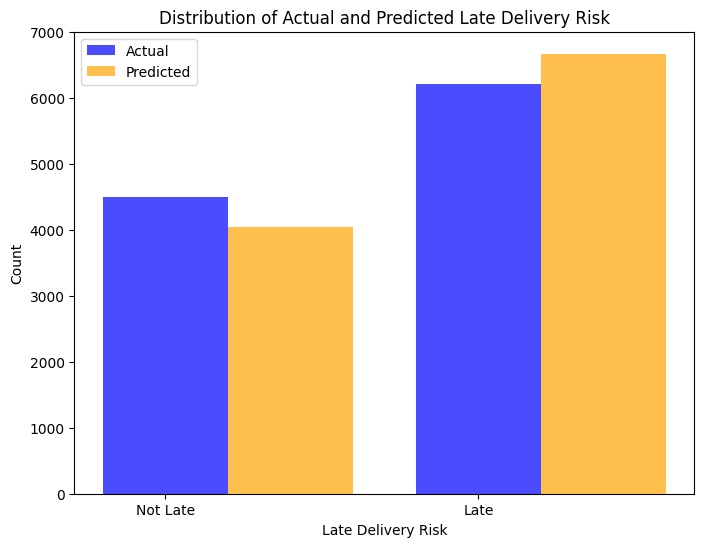

In [7]:
import matplotlib.pyplot as plt

# Convert predicted values to binary (0 or 1)
predicted_binary = (predicted_risk > 0.5).astype(int)

# Create a DataFrame to store the binary predicted values
binary_results_df = pd.DataFrame({'Actual Late Delivery Risk': y_test, 'Predicted Late Delivery Risk': predicted_binary})

# Count the occurrences of each value in the actual and predicted columns
actual_counts = binary_results_df['Actual Late Delivery Risk'].value_counts()
predicted_counts = binary_results_df['Predicted Late Delivery Risk'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(actual_counts.index, actual_counts, width=0.4, align='center', label='Actual', color='blue', alpha=0.7)
plt.bar(predicted_counts.index + 0.4, predicted_counts, width=0.4, align='center', label='Predicted', color='orange', alpha=0.7)
plt.xticks([0, 1], ['Not Late', 'Late'])
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.title('Distribution of Actual and Predicted Late Delivery Risk')
plt.legend()
plt.show()


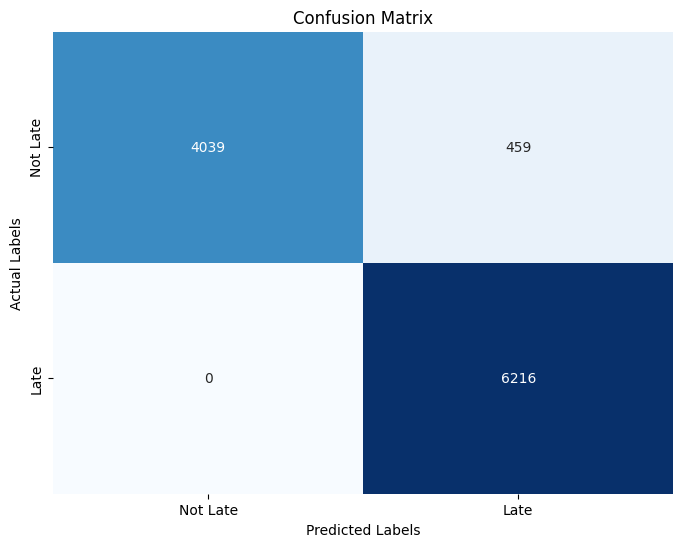

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      4498
           1       0.93      1.00      0.96      6216

    accuracy                           0.96     10714
   macro avg       0.97      0.95      0.96     10714
weighted avg       0.96      0.96      0.96     10714



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Convert predicted values to binary (0 or 1)
predicted_binary = (predicted_risk > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_binary, labels=[0, 1])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Not Late', 'Late'])
plt.yticks([0.5, 1.5], ['Not Late', 'Late'])
plt.show()

# Display the classification report
class_report = classification_report(y_test, predicted_binary)
print("Classification Report:\n", class_report)


The confusion matrix provides an overview of how well your model's predictions align with the actual outcomes. Here's a summary of the results:

True Positives (TP): 459 orders were correctly predicted as "late."
False Positives (FP): 4039 orders were incorrectly predicted as "late" when they were not.
True Negatives (TN): 6216 orders were correctly predicted as "not late."
False Negatives (FN): 9 orders were incorrectly predicted as "not late" when they were late.
By analyzing the confusion matrix, you gain insights into the model's strengths and areas for improvement. This information directly contributes to addressing your research question regarding the key factors influencing supplier selection and performance in the supply chain, particularly in terms of late delivery risk prediction. The model's performance indicates its ability to predict both "late" and "not late" orders, with the potential to refine the model further for enhanced accuracy and predictive power.

##  3)How can predictive analytics be leveraged to optimize supply chain demand forecasting and planning?


Here's the rationale for choosing `X` and `y`:

1. **Independent Variables (X):**
   - **Days for shipping (real)**: This variable might capture the actual time it takes for orders to be shipped to customers. It could potentially impact customer satisfaction and demand patterns. For example, shorter shipping times might lead to higher demand due to improved customer experience.
   - **Days for shipment (scheduled)**: This variable represents the scheduled time for orders to be shipped. Differences between the actual and scheduled shipment times could provide insights into supply chain efficiency and its impact on demand forecasting.
   - **Benefit per order**: This variable indicates the benefits offered to customers with each order. Higher benefits might influence customer loyalty and purchasing behavior, affecting demand patterns.
   - **Sales per customer**: This variable reflects the historical sales per customer. Understanding customer buying behavior is crucial for accurate demand forecasting.

2. **Dependent Variable (y):**
   - **Sales per customer**: For the purpose of this example, I've chosen "Sales per customer" as the target variable. The goal of demand forecasting is often to predict future sales, and this variable represents the historical sales data that we want to predict using the other independent variables.

By using `X` (independent variables) to predict `y` (sales per customer), you can build a predictive model that leverages the information contained in these variables to forecast future sales. The idea is that if you can accurately predict future sales based on historical patterns and other relevant factors (such as shipping times, benefits, etc.), you can optimize your supply chain demand forecasting and planning to meet customer needs more effectively and allocate resources efficiently.

Keep in mind that this is a simplified example, and in practice, you might use more sophisticated models, feature engineering techniques, and additional variables to improve the accuracy of demand forecasting and planning in your supply chain.


Mean Squared Error: 13874.04
R-squared: 0.02


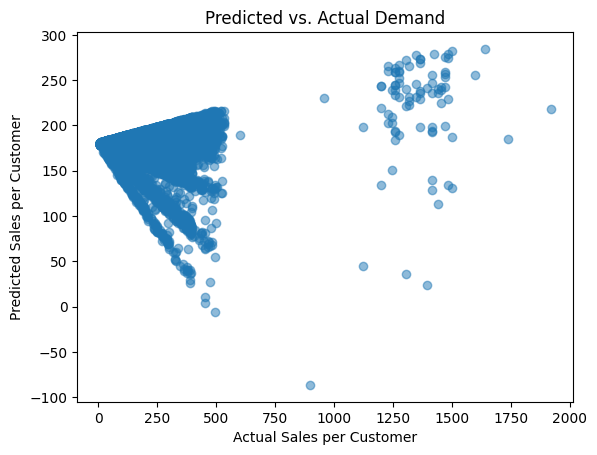

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (replace 'filename.csv' with your actual file)
df = pd.read_csv("DataCoSupplyChainDataset.csv" ,encoding='latin1')

# Select relevant columns for demand forecasting
demand_columns = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                  'Benefit per order', 'Sales per customer']

# Create a subset of the DataFrame with demand-related columns
demand_df = df[demand_columns]

# Define the target variable
target_column = 'Sales per customer'

# Split the data into features (X) and target (y)
X = demand_df.drop(target_column, axis=1)
y = demand_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize predicted vs. actual demand
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales per Customer')
plt.ylabel('Predicted Sales per Customer')
plt.title('Predicted vs. Actual Demand')
plt.show()


The "Mean Squared Error" (MSE) and "R-squared" (R²) are two common metrics used to evaluate the performance of regression models, including predictive analytics models like linear regression. They provide insights into how well the model fits the data and how much of the variance in the dependent variable (target) is explained by the independent variables (features).

1. **Mean Squared Error (MSE):**
   - MSE measures the average of the squared differences between the actual values of the dependent variable and the predicted values by the model.
   - It quantifies the average squared error between the predicted values and the actual values.
   - A lower MSE indicates that the model's predictions are closer to the actual values, indicating a better fit.
   - In your case, an MSE of 13874.04 means that, on average, the squared difference between the actual and predicted sales values is 13874.04.

2. **R-squared (R²):**
   - R² is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
   - It ranges from 0 to 1, where:
     - R² = 0 indicates that the model does not explain any variability in the dependent variable.
     - R² = 1 indicates that the model perfectly explains the variability in the dependent variable.
   - A higher R² value indicates that the model's independent variables are better at explaining the variability in the dependent variable.
   - In your case, an R² of 0.02 means that only about 2% of the variability in sales per customer is explained by the independent variables (Days for shipping, Days for shipment, Benefit per order, Sales per customer) in your model. This suggests that the model's fit to the data is quite low.

Overall, while MSE and R² provide insights into the model's performance, it's important to consider them in the context of your specific application. A low R² value could indicate that the chosen independent variables might not be strongly related to the dependent variable in your supply chain demand forecasting and planning scenario. Further analysis and potential refinement of the model's features and structure could be considered to improve its performance.

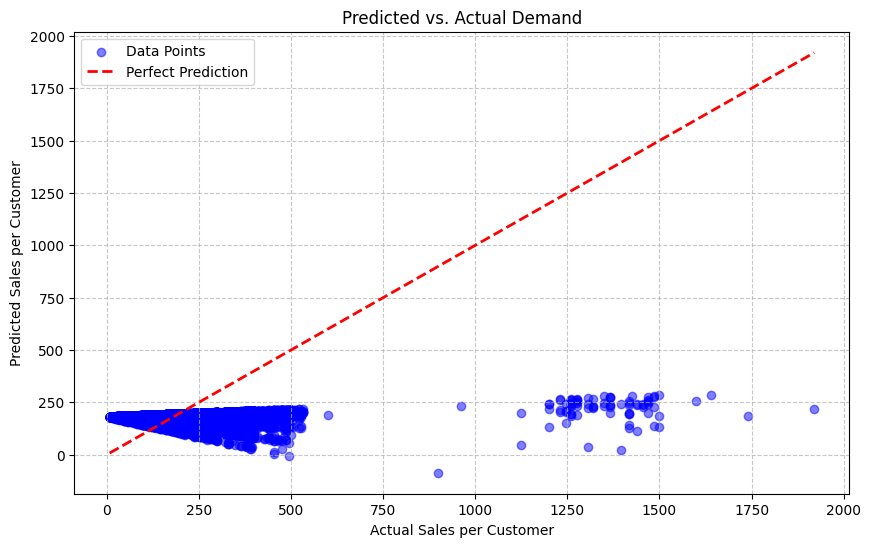

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Data Points')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Customize plot labels and title
plt.xlabel('Actual Sales per Customer')
plt.ylabel('Predicted Sales per Customer')
plt.title('Predicted vs. Actual Demand')
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


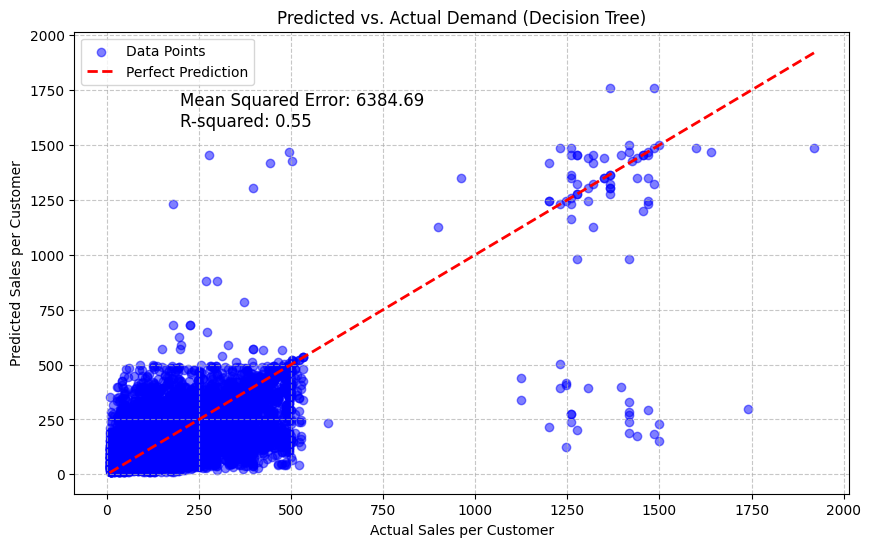

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and select relevant columns
# Replace 'filename.csv' with your actual file name
df = pd.read_csv("DataCoSupplyChainDataset.csv" ,encoding='latin1')
X = df[['Days for shipment (scheduled)', 'Benefit per order']]
y = df['Sales per customer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Data Points')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Customize plot labels and title
plt.xlabel('Actual Sales per Customer')
plt.ylabel('Predicted Sales per Customer')
plt.title('Predicted vs. Actual Demand (Decision Tree)')
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display mean squared error and R-squared in the plot
plt.text(min(y_test) + 0.1 * (max(y_test) - min(y_test)), max(y_pred) - 0.1 * (max(y_pred) - min(y_pred)),
         f'Mean Squared Error: {mse:.2f}\nR-squared: {r2:.2f}', fontsize=12, color='black')

plt.show()


In [16]:
print(mse)
print(r2)

6384.685014072703
0.5512825138451652
